## Building deep learning models with keras

### Titanic dataset

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../datasets/titanic.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [5]:
df['age_was_missing'] = df['Age'].isnull() * 1

In [6]:
df.Age.fillna(df.Age.mean(), inplace=True)

In [7]:
df['male'] = (df.Sex == 'male') * 1

In [8]:
df = pd.get_dummies(df, columns=['Embarked'])

In [9]:
df.drop(['Cabin', 'Ticket', 'Sex'], inplace=True, axis=1)

In [10]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,age_was_missing,male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,0,0,1,0,0
3,1,3,26.0,0,0,7.9250,0,0,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived           891 non-null int64
Pclass             891 non-null int64
Age                891 non-null float64
SibSp              891 non-null int64
Parch              891 non-null int64
Fare               891 non-null float64
age_was_missing    891 non-null int64
male               891 non-null int64
Embarked_C         891 non-null uint8
Embarked_Q         891 non-null uint8
Embarked_S         891 non-null uint8
dtypes: float64(2), int64(6), uint8(3)
memory usage: 65.3 KB


### Train test split

In [22]:
msk = np.random.rand(len(df)) < 0.7

In [23]:
df_train = df[msk]
df_train.shape

(603, 11)

In [24]:
df_test = df[~msk]
df_test.shape

(288, 11)

### Classification model

In [12]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

Using TensorFlow backend.


In [13]:
# Convert the target to categorical
target = to_categorical(df_train.Survived)

In [76]:
predictors = df_train.drop('Survived', axis=1).values
predictors.shape

(603, 10)

In [15]:
n_cols = predictors.shape[1]
n_cols

10

In [16]:
# Set up the model
model = Sequential()

In [17]:
# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

In [18]:
# Add the output layer
model.add(Dense(2, activation='softmax'))

In [19]:
# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Fit the model
model.fit(predictors, target)

Epoch 1/10
891/891 [==============================] - 0s - loss: 2.6650 - acc: 0.6195     
Epoch 2/10
891/891 [==============================] - 0s - loss: 1.5613 - acc: 0.5915     
Epoch 3/10
891/891 [==============================] - 0s - loss: 0.8660 - acc: 0.6285     
Epoch 4/10
891/891 [==============================] - 0s - loss: 0.6487 - acc: 0.6667     
Epoch 5/10
891/891 [==============================] - 0s - loss: 0.6623 - acc: 0.6633     
Epoch 6/10
891/891 [==============================] - 0s - loss: 0.6164 - acc: 0.6869     
Epoch 7/10
891/891 [==============================] - 0s - loss: 0.6153 - acc: 0.6914     
Epoch 8/10
891/891 [==============================] - 0s - loss: 0.6194 - acc: 0.6880     
Epoch 9/10
891/891 [==============================] - 0s - loss: 0.6036 - acc: 0.6992     
Epoch 10/10
891/891 [==============================] - 0s - loss: 0.6133 - acc: 0.6914     


In [26]:
pred_data = df_test.drop('Survived', axis=1).values
pred_data

array([[  1.        ,  35.        ,   1.        , ...,   0.        ,
          0.        ,   1.        ],
       [  3.        ,  29.69911765,   0.        , ...,   0.        ,
          1.        ,   0.        ],
       [  1.        ,  54.        ,   0.        , ...,   0.        ,
          0.        ,   1.        ],
       ..., 
       [  3.        ,  20.        ,   0.        , ...,   0.        ,
          0.        ,   1.        ],
       [  2.        ,  28.        ,   0.        , ...,   0.        ,
          0.        ,   1.        ],
       [  1.        ,  19.        ,   0.        , ...,   0.        ,
          0.        ,   1.        ]])

In [31]:
# Calculate predictions
predictions = model.predict(pred_data)

In [32]:
# Calculate predicted probability of survival
predicted_prob_true = predictions[:,1]

## Fine-tuning keras models

### Changing optimization parameters

In [33]:
from keras.optimizers import SGD

In [34]:
# Create list of learning rates
lr_to_test = [0.000001, 0.01,1]

In [36]:
input_shape = (n_cols,)

In [38]:
def get_new_model(input_shape=input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [41]:
# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)



Testing model with learning rate: 0.000001

Epoch 1/10
891/891 [==============================] - 0s - loss: 3.4049     
Epoch 2/10
891/891 [==============================] - 0s - loss: 3.3598     
Epoch 3/10
891/891 [==============================] - 0s - loss: 3.3148     
Epoch 4/10
891/891 [==============================] - 0s - loss: 3.2698     
Epoch 5/10
891/891 [==============================] - 0s - loss: 3.2248     
Epoch 6/10
891/891 [==============================] - 0s - loss: 3.1800     
Epoch 7/10
891/891 [==============================] - 0s - loss: 3.1350     
Epoch 8/10
891/891 [==============================] - 0s - loss: 3.0897     
Epoch 9/10
891/891 [==============================] - 0s - loss: 3.0444     
Epoch 10/10
891/891 [==============================] - 0s - loss: 2.9989     


Testing model with learning rate: 0.010000

Epoch 1/10
891/891 [==============================] - 0s - loss: 1.9807     
Epoch 2/10
891/891 [==============================] - 0s - l

### Evaluating model accuracy on validation dataset

In [43]:
model = get_new_model()

In [44]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
# Fit the model
hist = model.fit(predictors, target, validation_split=0.3)

Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 0s - loss: 1.0575 - acc: 0.5843 - val_loss: 0.7592 - val_acc: 0.6455
Epoch 2/10
623/623 [==============================] - 0s - loss: 0.6799 - acc: 0.6485 - val_loss: 0.6226 - val_acc: 0.6679
Epoch 3/10
623/623 [==============================] - 0s - loss: 0.6252 - acc: 0.6661 - val_loss: 0.6472 - val_acc: 0.7090
Epoch 4/10
623/623 [==============================] - 0s - loss: 0.6340 - acc: 0.6950 - val_loss: 0.5820 - val_acc: 0.6903
Epoch 5/10
623/623 [==============================] - 0s - loss: 0.6615 - acc: 0.6886 - val_loss: 0.5848 - val_acc: 0.7052
Epoch 6/10
623/623 [==============================] - 0s - loss: 0.6311 - acc: 0.7095 - val_loss: 0.5063 - val_acc: 0.7575
Epoch 7/10
623/623 [==============================] - 0s - loss: 0.6073 - acc: 0.7063 - val_loss: 0.5722 - val_acc: 0.7164
Epoch 8/10
623/623 [==============================] - 0s - loss: 0.5756 - acc: 0.7143 - val_l

### Early stopping: Optimizing the optimization

In [52]:
from keras.callbacks import EarlyStopping

In [53]:
model = get_new_model()

In [54]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

In [56]:
# Fit the model
model.fit(predictors, target, validation_split=0.3, epochs=30, callbacks=[early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 0s - loss: 1.0688 - acc: 0.6003 - val_loss: 0.5605 - val_acc: 0.7052
Epoch 2/30
623/623 [==============================] - 0s - loss: 0.7183 - acc: 0.6356 - val_loss: 0.9839 - val_acc: 0.6418
Epoch 3/30
623/623 [==============================] - 0s - loss: 0.6687 - acc: 0.6693 - val_loss: 0.6448 - val_acc: 0.7164
Epoch 4/30
623/623 [==============================] - 0s - loss: 0.7170 - acc: 0.6308 - val_loss: 0.5847 - val_acc: 0.7276


### Experimenting with wider networks

In [97]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

In [98]:
predictors = df.drop('Survived', axis=1).values
predictors.shape

(891, 10)

In [99]:
target = to_categorical(df.Survived)
target.shape

(891, 2)

In [100]:
# Create the new model
model_1 = Sequential()

# Add the first and second layers
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))

# Add the output layer
model_1.add(Dense(2, activation='softmax'))

# Compile model_1
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [101]:
# Create the new model
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [102]:
# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, \
                               callbacks=[early_stopping_monitor], verbose=False)

In [103]:
# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, \
                               callbacks=[early_stopping_monitor], verbose=False)

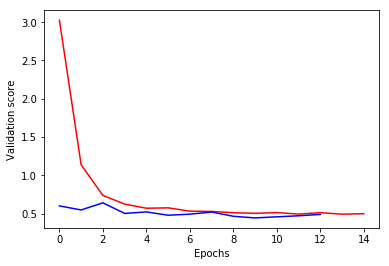

In [104]:
# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

### Adding layers to a network

In [105]:
# Create the new model
model_1 = Sequential()

# Add the first, second, and third hidden layers
model_1.add(Dense(50, activation='relu', input_shape = input_shape))

# Add the output layer
model_1.add(Dense(2, activation='softmax'))

# Compile model_1
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [106]:
# Create the new model
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape = input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [107]:
# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, \
                               callbacks=[early_stopping_monitor], verbose=False)

In [108]:
# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, \
                               callbacks=[early_stopping_monitor], verbose=False)

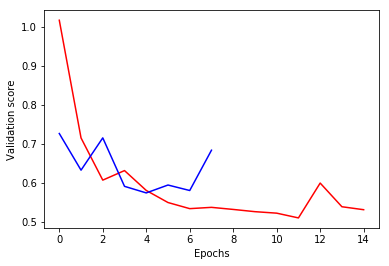

In [109]:
# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()